<a href="https://colab.research.google.com/github/SaraPouyan/Building-a-ChatGPT-like-Model-from-Scratch/blob/main/3_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  <font color='#FFE15D'><b>üíé Tokenization</b></font>

# üî¥ **Environment Setup**

## üü† `pip`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!pip install -U -q datasets

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 491.5/491.5 kB 14.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 193.6/193.6 kB 17.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda

In [6]:
!pip install -q datasets torchmetrics

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 961.5/961.5 kB 25.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 13.8/13.8 MB 122.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 24.6/24.6 MB 90.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 883.7/883.7 kB 57.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ

In [7]:
!pip install -q hazm

  Preparing metadata (setup.py) ... done
     ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 60.6/60.6 kB 3.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 892.6/892.6 kB 27.2 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 17.3/17.3 MB 107.8 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4.4/4.4 MB 122.9 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 26.7/26.7 MB 87.0 MB/s eta 0:00:00
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1.3/1.3 MB 75.5 MB/s eta 0:00:00
   ‚

In [8]:
!pip install -q arabic_reshaper python-bidi

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 292.9/292.9 kB 12.8 MB/s eta 0:00:00


# üî¥ **Import**

In [1]:
from pprint import pprint
import random
from tqdm import tqdm
import numpy as np

import datasets
from datasets import load_dataset
from tokenizers import Tokenizer, models, pre_tokenizers, trainers, decoders

import torch
from torch.utils.data import Dataset, TensorDataset, random_split, DataLoader
import torch.nn as nn
from torch.nn import functional as F
from torch import optim

from torchmetrics.aggregation import MeanMetric

from hazm import Normalizer, WordTokenizer
from collections import Counter
import itertools

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import arabic_reshaper
from bidi.algorithm import get_display

In [3]:
!python --version

Python 3.11.12


In [4]:
datasets.__version__

'3.6.0'

# üî¥ **Excercise**

## üü£ **Train a Tokenizer for a Persian Dataset**

Train a Byte Pair Encoding (BPE) tokenizer on a Persian dataset from Hugging Face, and analyze the trained tokenizer

### üü° **Hugging Face's Persian-language dataset**
- **`farsi_news`** [üîó](https://huggingface.co/datasets/community-datasets/farsi_news)






In [ ]:
# farsi_news dataset
dataset = load_dataset("community-datasets/farsi_news")
dataset

DatasetDict({
    hamshahri: Dataset({
        features: ['title', 'summary', 'link', 'tags'],
        num_rows: 2203
    })
    radiofarda: Dataset({
        features: ['title', 'summary', 'link', 'tags'],
        num_rows: 284
    })
})

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['hamshahri']))
    title = dataset['hamshahri'][idx]['title']
    summary = dataset['hamshahri'][idx]['summary']
    return (title, summary)

sample_title, sample_summary = get_sample(dataset)
print("Title:")
pprint(sample_title)
print("Summary:")
pprint(sample_summary)

Title:
'⁄©€åŸÅ€åÿ™ ŸáŸàÿß€å ÿ™Ÿáÿ±ÿßŸÜ ÿ≥ÿßŸÑŸÖ ÿßÿ≥ÿ™'
Summary:
('⁄©€åŸÅ€åÿ™ ŸáŸàÿß€å Ÿæÿß€åÿ™ÿÆÿ™ ÿßŸÖÿ±Ÿàÿ≤ ⁄ÜŸáÿßÿ±ÿ¥ŸÜÿ®Ÿá €≤€∑ ŸÅÿ±Ÿàÿ±ÿØ€åŸÜ ŸÖÿßŸá ÿ®ÿß ÿßŸÅÿ≤ÿß€åÿ¥ ÿ∫ŸÑÿ∏ÿ™ ÿ¢ŸÑÿß€åŸÜÿØ⁄Ø€å ÿ∞ÿ±ÿßÿ™ '
 'ŸÖÿπŸÑŸÇ ⁄©ŸÖÿ™ÿ± ÿßÿ≤ €≤.€µ ŸÖ€å⁄©ÿ±ŸàŸÜ ÿ®ÿß ÿ¥ÿßÿÆÿµ ŸÑÿ≠ÿ∏Ÿá\u200cÿß€å €∏€∞ ÿØÿ± ÿ¥ÿ±ÿß€åÿ∑ ŸÇÿßÿ®ŸÑ ŸÇÿ®ŸàŸÑ €åÿß ŸáŸÖÿßŸÜ '
 'ÿ≥ÿßŸÑŸÖ ÿßÿ≥ÿ™.')


- **`ByteLevel Pre-tokenizer`**
- **`ByteLevel decoder`**

In [ ]:
# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Use a ByteLevel pre-tokenizer to split text into words
tokenizer.pre_tokenizer = pre_tokenizers.ByteLevel()

# Load a dataset
dataset = load_dataset("community-datasets/farsi_news", split="hamshahri")
texts = [
    f"{item['title']} {item['summary']}"
    for item in dataset
    if item['title'] and item['summary']
]

# Initialize a BPE trainer
trainer = trainers.BpeTrainer(
    vocab_size=8000,
    special_tokens=["[UNK]", "[PAD]"],
    min_frequency=2
    )

# Train the tokenizer on a dataset
tokenizer.train_from_iterator(texts, trainer)

# Add decoder
tokenizer.decoder = decoders.ByteLevel()

# Save the trained tokenizer
tokenizer.save("farsi_news_bpe_tokenizer.json")

In [ ]:
# Tokenize a sample text
sample_text = "ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ."
encoding = tokenizer.encode(sample_text)

readable_tokens = []
for token in encoding.tokens:
    if token.startswith('[') and token.endswith(']'):
        readable_tokens.append(token)
    else:
        readable_tokens.append(decoders.ByteLevel().decode([token]))

decoded_text = tokenizer.decode(encoding.ids)

# Results
print("üìù Input text:\n", sample_text)
print("\nüî§ Tokens:\n", readable_tokens)
print("\nüßæ Decoded text:\n", decoded_text)

üìù Input text:
 ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ.

üî§ Tokens:
 [' ÿ≥€åÿ≥ÿ™ŸÖ', ' ÿ™⁄©', 'ÿßŸÖŸÑ', ' ŸáŸàÿ¥ŸÖŸÜÿØ', ' S', 'm', 'ar', 't', ' ', 'E', 'v', 'o', 'l', 'u', 't', 'i', 'on', ' ÿ≥ÿßŸÖ', 'ÿ≥', 'ŸàŸÜ⁄Ø', ' ÿßÿ®ÿπÿßÿØ', ' ŸÅŸÜ€å', ' ŸÖŸáŸÜÿØÿ≥€å', ' ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ', ' ÿ¥ŸÖÿß', ' ÿ±ÿß', ' ÿ®', 'ÿ∑Ÿàÿ±', ' ⁄©ÿßŸÖŸÑ', ' ÿπŸà', 'ÿ∂', ' ŸÖ€å', '\u200c', '⁄©ŸÜÿØ', ' ÿ®ÿØŸàŸÜ', ' ÿß€åŸÜ⁄©Ÿá', ' ŸÜ€åÿßÿ≤', ' ÿ®Ÿá', ' ÿ™ÿπŸà€åÿ∂', ' ⁄©ŸÑ', ' ÿØÿ≥ÿ™⁄ØÿßŸá', ' ÿ®ÿßÿ¥ÿØ', '.']

üßæ Decoded text:
  ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ.


- **`DeepSentiPers`** [üîó](https://huggingface.co/datasets/PartAI/DeepSentiPers)

In [ ]:
# DeepSentiPers dataset
dataset = load_dataset("PartAI/DeepSentiPers")
dataset

DatasetDict({
    train: Dataset({
        features: ['review', 'label'],
        num_rows: 6320
    })
    dev: Dataset({
        features: ['review', 'label'],
        num_rows: 703
    })
    test: Dataset({
        features: ['review', 'label'],
        num_rows: 1854
    })
})

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['train']))
    return dataset['train'][idx]['review']

sample = get_sample(dataset)
pprint(sample)

('ÿß€åŸÜ ÿØŸàÿ±ÿ®€åŸÜ ÿ®ÿß Ÿàÿ≤ŸÜ ÿ™ŸÜŸáÿß 167 ⁄Øÿ±ŸÖÿå ÿ¢ŸÜ ŸÇÿØÿ± ⁄©Ÿà⁄Ü⁄© ÿ≥ÿ®⁄© ÿßÿ≥ÿ™ ⁄©Ÿá ŸÖ€å ÿ™ŸàÿßŸÜ ÿ¢ŸÜ ÿ±ÿß ÿ®ÿ±ÿß€å '
 'Ÿæ⁄òŸàŸáÿ¥ Ÿáÿß€å ÿπŸÑŸÖ€å ÿ±ŸÅÿ™ÿßÿ± ÿ≠€åŸàÿßŸÜÿßÿ™ ÿ®ÿ± ÿ±Ÿà€å ÿ®ÿØŸÜ €å⁄© ÿ≠€åŸàÿßŸÜ €åÿß ÿ®ÿ±ÿß€å ŸÅ€åŸÑŸÖ ÿ®ÿ±ÿØÿßÿ±€å ŸáŸàÿß€å€å '
 'ÿ®ÿ± ÿ±Ÿà€å €å⁄© ŸáŸÑ€å⁄©ŸàŸæÿ™ÿ± ⁄©ŸÜÿ™ÿ±ŸÑ ÿßÿ≤ ÿ±ÿßŸá ÿØŸàÿ± €åÿß €å⁄© ÿ®ÿßŸÑŸàŸÜ ŸáŸÖ ŸÜÿµÿ® ⁄©ÿ±ÿØ!')


In [ ]:
dataset = load_dataset("PartAI/DeepSentiPers")
texts = [sample["review"] for sample in dataset["train"]]
len(texts)

6320

- **`Metaspace pre-tokenizer`**
- **`Metaspace decoder`**

In [ ]:
# Initialize a BPE tokenizer
tokenizer = Tokenizer(models.BPE(unk_token="[UNK]"))

# Use a Metaspace pre-tokenizer to split text into words
tokenizer.pre_tokenizer = pre_tokenizers.Metaspace()


# Load a dataset
dataset = load_dataset("PartAI/DeepSentiPers")
texts = [sample["review"] for sample in dataset["train"]]

# Initialize a BPE trainer
trainer = trainers.BpeTrainer(
    vocab_size=8000,
    special_tokens=["[PAD]", "[UNK]", "[CLS]", "[SEP]", "[MASK]"]
)

# Train the tokenizer on a dataset
tokenizer.train_from_iterator(texts, trainer)

# Add decoder
tokenizer.decoder = decoders.Metaspace()

# Save the trained tokenizer
tokenizer.save("persian_text_sentiment_bpe_tokenizer.json")

In [ ]:
#tokenizer = Tokenizer.from_file("persian_text_sentiment_bpe_tokenizer.json")

examples = [
    "ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ.",
    "ÿßÿµŸÑÿßŸã ÿ±ÿßÿ∂€å ŸÜÿ®ŸàÿØŸÖÿå ÿ®ÿ≥ÿ™Ÿá‚Äåÿ®ŸÜÿØ€å ÿÆÿ±ÿßÿ® ÿ®ŸàÿØ Ÿà ⁄©ÿßŸÑÿß ÿßÿ¥ÿ™ÿ®ÿßŸá ÿßÿ±ÿ≥ÿßŸÑ ÿ¥ÿØ.",
    "ÿÆ€åŸÑ€å ÿÆŸàÿ®Ÿáÿå ŸàŸÑ€å ⁄©ÿßÿ¥ ÿ®ÿßÿ™ÿ±€åÿ¥ ÿ®€åÿ¥ÿ™ÿ± ÿØŸàÿßŸÖ ŸÖ€å‚Äåÿ¢Ÿàÿ±ÿØ.",
    "⁄ØŸàÿ¥€å a24 ⁄©Ÿá ÿßÿ≤ ŸÖÿ≠ÿ®Ÿàÿ®‚Äåÿ™ÿ±€åŸÜ ⁄ØŸàÿ¥€å 2023 ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ŸÖ€å‚Äåÿ®ÿßÿ¥ÿØÿå ŸÖÿ¨Ÿáÿ≤ ÿ®Ÿá ÿµŸÅÿ≠Ÿá ŸÜŸÖÿß€åÿ¥ 6.5 ÿß€åŸÜ⁄Ü€å ÿ®ÿß ÿ±ÿ≤ŸàŸÑŸàÿ¥ŸÜ 1080x2340 Ÿæ€å⁄©ÿ≥ŸÑ ÿßÿ≥ÿ™.",
]

for text in examples:
    output = tokenizer.encode(text)
    print("\nüìù Input text:\n", text)
    print("\nüî§ Tokens:\n", output.tokens)
    print("\nüßæ Decoded text:\n", tokenizer.decode(output.ids))
    print(60*"----")


üìù Input text:
 ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ.

üî§ Tokens:
 ['‚ñÅÿ≥€åÿ≥ÿ™ŸÖ', '‚ñÅÿ™⁄©ÿßŸÖŸÑ', '‚ñÅŸáŸàÿ¥ŸÖŸÜÿØ', '‚ñÅSmart', '‚ñÅEvolution', '‚ñÅÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø', '‚ñÅÿßÿ®ÿπÿßÿØ', '‚ñÅŸÅŸÜ€å', '‚ñÅŸÖŸáŸÜÿØÿ≥€å', '‚ñÅÿ™ŸÑŸà€åÿ≤€åŸàŸÜ', '‚ñÅÿ¥ŸÖÿß', '‚ñÅÿ±ÿß', '‚ñÅÿ®ÿ∑Ÿàÿ±', '‚ñÅ⁄©ÿßŸÖŸÑ', '‚ñÅÿπŸàÿ∂', '‚ñÅŸÖ€å\u200c⁄©ŸÜÿØ', '‚ñÅÿ®ÿØŸàŸÜ', '‚ñÅÿß€åŸÜ⁄©Ÿá', '‚ñÅŸÜ€åÿßÿ≤', '‚ñÅÿ®Ÿá', '‚ñÅÿ™ÿπŸà€åÿ∂', '‚ñÅ⁄©ŸÑ', '‚ñÅÿØÿ≥ÿ™⁄ØÿßŸá', '‚ñÅÿ®ÿßÿ¥ÿØ.']

üßæ Decoded text:
 ÿ≥€åÿ≥ÿ™ŸÖ ÿ™⁄©ÿßŸÖŸÑ ŸáŸàÿ¥ŸÖŸÜÿØ Smart Evolution ÿ≥ÿßŸÖÿ≥ŸàŸÜ⁄Ø ÿßÿ®ÿπÿßÿØ ŸÅŸÜ€å ŸÖŸáŸÜÿØÿ≥€å ÿ™ŸÑŸà€åÿ≤€åŸàŸÜ ÿ¥ŸÖÿß ÿ±ÿß ÿ®ÿ∑Ÿàÿ± ⁄©ÿßŸÖŸÑ ÿπŸàÿ∂ ŸÖ€å‚Äå⁄©ŸÜÿØ ÿ®ÿØŸàŸÜ ÿß€åŸÜ⁄©Ÿá ŸÜ€åÿßÿ≤ ÿ®Ÿá ÿ™ÿπŸà€åÿ∂ ⁄©ŸÑ ÿØÿ≥ÿ™⁄ØÿßŸá ÿ®ÿßÿ¥ÿØ.
-----------------------------------------------------------------------------------

## üü£ **Word2Vec from Scratch**  

### üü° Step 1: Load and Preprocess the Dataset
- **` Persian News Summary (pn_summary) Dataset`** [üîó](https://huggingface.co/datasets/HooshvareLab/pn_summary)

In [3]:
dataset = load_dataset("HooshvareLab/pn_summary")
dataset

DatasetDict({
    train: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 82022
    })
    validation: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 5592
    })
    test: Dataset({
        features: ['id', 'title', 'article', 'summary', 'category', 'categories', 'network', 'link'],
        num_rows: 5593
    })
})

In [13]:
dataset['train'][0]

{'id': '738e296491f8b24c5aa63e9829fd249fb4428a66',
 'title': 'ŸÖÿØ€åÿ±€åÿ™ ŸÅÿ±Ÿàÿ¥ ŸÜŸÅÿ™ ÿØÿ± ÿØŸàÿ±ÿßŸÜ ÿ™ÿ≠ÿ±€åŸÖ ŸáŸàÿ¥ŸÖŸÜÿØÿßŸÜŸá ÿπŸÖŸÑ ⁄©ÿ±ÿØ',
 'article': 'ÿ®Ÿá ⁄Øÿ≤ÿßÿ±ÿ¥ ÿ¥ÿßŸÜÿßÿå ÿπŸÑ€å ⁄©ÿßÿ±ÿØÿ± ÿßŸÖÿ±Ÿàÿ≤ (€≤€∑ ÿØ€å ŸÖÿßŸá) ÿØÿ± ŸÖÿ±ÿßÿ≥ŸÖ ÿ™ŸàÿØ€åÿπ ŸÖÿ≠ÿ≥ŸÜ ŸÇŸÖÿµÿ±€åÿå ŸÖÿØ€åÿ± ÿ≥ÿßÿ®ŸÇ ÿßŸÖŸàÿ± ÿ®€åŸÜ ÿßŸÑŸÖŸÑŸÑ ÿ¥ÿ±⁄©ÿ™ ŸÖŸÑ€å ŸÜŸÅÿ™ ÿß€åÿ±ÿßŸÜ Ÿà ŸÖÿπÿßÿ±ŸÅŸá ÿ≥ÿπ€åÿØ ÿÆŸàÿ¥ÿ±Ÿàÿå ŸÖÿØ€åÿ± ÿ¨ÿØ€åÿØ ÿßŸÖŸàÿ± ÿ®€åŸÜ ÿßŸÑŸÖŸÑŸÑ ÿß€åŸÜ ÿ¥ÿ±⁄©ÿ™ÿå ⁄ØŸÅÿ™: ŸÖÿØ€åÿ±€åÿ™ ÿßŸÖŸàÿ± ÿ®€åŸÜ\u200eÿßŸÑŸÖŸÑŸÑ ÿ®Ÿá ÿπŸÜŸàÿßŸÜ €å⁄©€å ÿßÿ≤ ÿ™ÿßÿ´€åÿ±⁄Øÿ∞ÿßÿ±ÿ™ÿ±€åŸÜ ŸÖÿØ€åÿ±€åÿ™\u200cŸáÿß€å ÿ¥ÿ±⁄©ÿ™ ŸÖŸÑ€å ŸÜŸÅÿ™ ÿß€åÿ±ÿßŸÜ ÿØÿ± ÿØŸàÿ±ÿßŸÜ ÿ™ÿ≠ÿ±€åŸÖ\u200cŸáÿß€å ÿ∏ÿßŸÑŸÖÿßŸÜŸá ÿ∫ÿ±ÿ® ÿπŸÑ€åŸá ⁄©ÿ¥Ÿàÿ±ŸÖÿßŸÜ ÿ®ÿ≥€åÿßÿ± ŸáŸàÿ¥ŸÖŸÜÿØÿßŸÜŸá ÿπŸÖŸÑ ⁄©ÿ±ÿØ Ÿà ŸÖÿß ÿ™ŸàÿßŸÜÿ≥ÿ™€åŸÖ ÿ®Ÿá ÿÆŸàÿ®€å ÿßÿ≤ ÿπŸáÿØŸá ÿ™ÿ≠ÿ±€åŸÖ\u200cŸáÿß ÿ®ÿ±ÿ¢€å€åŸÖ. [n] Ÿà€å ÿßŸÅÿ≤ŸàÿØ: ŸÖÿ¨ŸÖŸàÿπŸá ÿßŸÖŸàÿ± ÿ®€åŸÜ ÿßŸÑŸÖŸÑŸÑ ÿØÿ± ŸáŸÖŸá ÿØŸàÿ±ÿßŸÜ\u200cŸáÿß ÿ®ÿß ÿ≥ÿÆÿ™€å\u200cŸáÿß Ÿà ŸÖÿ¥⁄©ŸÑÿßÿ™ ÿ®ÿ≥€åÿßÿ±€å

In [ ]:
def get_sample(dataset):
    idx = random.randint(0, len(dataset['train']))
    return dataset['train'][idx]['article']

sample = get_sample(dataset)
pprint(sample)

('ÿ®Ÿá ⁄Øÿ≤ÿßÿ±ÿ¥ ÿ±Ÿàÿ≤ ÿ≥Ÿá ÿ¥ŸÜÿ®Ÿá ÿß€åÿ±ŸÜÿß ÿ®Ÿá ŸÜŸÇŸÑ ÿßÿ≤ ÿ™ÿßÿ±ŸÜŸÖÿß€å ÿÆÿ®ÿ±€å ÿß€åŸÜ ⁄©ŸÖ€åÿ≥ÿßÿ±€åÿßÿå ŸÜŸáÿßÿØ ŸÖÿ≤ÿ®Ÿàÿ± '
 'ÿ®ÿß ÿµÿØŸàÿ± ÿ®€åÿßŸÜ€åŸá\u200cÿß€å ÿßÿπŸÑÿßŸÖ ⁄©ÿ±ÿØ ⁄©Ÿá ÿßŸàŸÑ€åŸÜ ⁄Øÿ±ŸàŸá ⁄©ŸàÿØ⁄©ÿßŸÜ ÿßÿ≤ ÿ≠ÿØŸàÿØ €±€∞ Ÿáÿ≤ÿßÿ± ⁄©ŸàÿØ⁄©€å '
 '⁄©Ÿá ÿØÿ±ÿÆŸàÿßÿ≥ÿ™ ÿ™ÿßÿ®ÿπ€åÿ™ ÿ¥ÿßŸÜ ÿ™ÿß⁄©ŸÜŸàŸÜ Ÿæÿ∞€åÿ±ŸÅÿ™Ÿá ÿ¥ÿØŸá ÿßÿ≥ÿ™ÿå ŸÖÿßŸá ⁄Øÿ∞ÿ¥ÿ™Ÿá ÿßÿ≥ŸÜÿßÿØ ŸáŸà€åÿ™€å ÿß€åÿ±ÿßŸÜ '
 'ŸÖŸàÿ≥ŸàŸÖ ÿ®Ÿá ÿ¥ŸÜÿßÿ≥ŸÜÿßŸÖŸá ÿ±ÿß ÿØÿ±€åÿßŸÅÿ™ ⁄©ÿ±ÿØŸÜÿØ. [n] ÿß€åŸÜ ÿ®€åÿßŸÜ€åŸáÿßÿØÿ¢Ÿàÿ± ÿ¥ÿØ ⁄©Ÿá ÿ∑ÿ®ŸÇ ÿßÿπŸÑÿßŸÖ ÿØŸàŸÑÿ™ '
 'ÿß€åÿ±ÿßŸÜÿå ÿ™ŸÇÿ±€åÿ®ÿß €∑€µ Ÿáÿ≤ÿßÿ± ⁄©ŸàÿØ⁄© ÿØÿ± ŸÖÿπÿ±ÿ∂ ÿÆÿ∑ÿ± ŸÅÿßŸÇÿØ ŸÖŸÑ€åÿ™ÿå Ÿàÿßÿ¨ÿØ ÿ¥ÿ±ÿß€åÿ∑ ÿ®ÿ±ÿÆŸàÿ±ÿØÿßÿ±€å ÿßÿ≤ ÿ≠ŸÇ '
 'ÿ™ÿßÿ®ÿπ€åÿ™ ÿß€åÿ±ÿßŸÜ ÿ®Ÿá ŸÖŸàÿ¨ÿ® ŸÇÿßŸÜŸàŸÜ ÿ¨ÿØ€åÿØ ŸÖŸÑ€åÿ™ Ÿáÿ≥ÿ™ŸÜÿØÿõ ŸÇÿßŸÜŸàŸÜ€å ⁄©Ÿá ÿØÿ± ÿ≥ÿßŸÑ €≤€∞€±€πŸÖ€åŸÑÿßÿØ€å '
 'ÿßÿµŸÑÿßÿ≠ ÿ¥ÿØ ÿ™ÿß ÿ®Ÿá ⁄©ŸàÿØ⁄©ÿßŸÜ ÿ≤€åÿ± €±€∏ ÿ≥ÿßŸÑ ÿßŸÖ⁄©ÿßŸÜ ÿØÿ±ÿÆŸàÿßÿ≥ÿ™ ÿßÿ≥ŸÜÿßÿØ ŸáŸà€åÿ™€å ÿßÿπÿ∑ÿß ⁄©ŸÜÿØ. [n] ÿØÿ± '
 'ÿ¨ÿ±€åÿßŸÜ ÿ¥€åŸàÿπ ⁄©ÿ±ŸàŸÜÿß ÿ

In [4]:
n = 30000
subset = dataset["train"].select(range(n))
train_texts = [sample["article"] for sample in subset]

### üü° Step 2: Tokenization

In [5]:
class SimpleTokenizer:
    def __init__(self, texts, min_freq=5, vocab_size=10000):
        self.normalizer = Normalizer()
        self.tokenizer = WordTokenizer()
        self.min_freq = min_freq
        self.vocab_size = vocab_size
        self.pad_token = "<PAD>"
        self.unk_token = "<UNK>"
        self._build_vocab(texts)

    def _normalize_and_tokenize(self, text):
        text = self.normalizer.normalize(text)
        return self.tokenizer.tokenize(text)

    def _build_vocab(self, texts):
        all_tokens = itertools.chain.from_iterable(
            self._normalize_and_tokenize(text) for text in texts
        )

        token_freq = Counter(all_tokens)

        token_freq = {token: freq for token, freq in token_freq.items() if freq >= self.min_freq}

        # Keep top-K frequent tokens
        most_common = sorted(token_freq.items(), key=lambda x: -x[1])[:self.vocab_size - 2]

        # token ‚Üí id
        self.token_to_id_map = {
            self.pad_token: 0,
            self.unk_token: 1
        }
        self.token_to_id_map.update({
            token: idx + 2 for idx, (token, _) in enumerate(most_common)
        })

        # id ‚Üí token
        self.id_to_token_map = {idx: token for token, idx in self.token_to_id_map.items()}

    def get_vocab(self):
        return self.token_to_id_map

    def get_vocab_size(self):
        return len(self.token_to_id_map)

    def token_to_id(self, token):
        return self.token_to_id_map.get(token, self.token_to_id_map[self.unk_token])

    def id_to_token(self, idx):
        return self.id_to_token_map.get(idx, self.unk_token)

    def encode(self, text):
        tokens = self._normalize_and_tokenize(text)
        return [self.token_to_id(token) for token in tokens]

    def decode(self, ids):
        return [self.id_to_token(idx) for idx in ids]


In [6]:
tokenizer = SimpleTokenizer(train_texts)
tokenized_data = [tokenizer.encode(sample) for sample in train_texts]

### üü° Step 3: Prepare Training Data (Skip-Gram)

In [7]:
def generate_skip_gram_pairs(tokenized_data, window_size=2):
    skip_gram_pairs = []

    for tokens in tokenized_data:
        for i, target_token in enumerate(tokens):
            start = max(0, i - window_size)
            end = min(len(tokens), i + window_size + 1)
            for j in range(start, end):
                if i != j:
                    skip_gram_pairs.append((target_token, tokens[j]))

    return torch.tensor(skip_gram_pairs, dtype=torch.long)

In [8]:
skip_gram_pairs = generate_skip_gram_pairs(tokenized_data, window_size=2)
print(skip_gram_pairs.shape)

torch.Size([42324788, 2])


In [13]:
skip_gram_pairs[:5]

tensor([[  5,  30],
        [  5, 171],
        [ 30,   5],
        [ 30, 171],
        [ 30,   4]])

In [11]:
sample = "ÿßŸÖÿ±Ÿàÿ≤ ŸáŸàÿß ÿÆ€åŸÑ€å ⁄Øÿ±ŸÖ ÿ®ŸàÿØ"
token_id_sample = tokenizer.encode(sample)
tensor_pairs = generate_skip_gram_pairs([token_id_sample], window_size=2)

In [12]:
# print each pair using the tokenizer
for pair in tensor_pairs:
    token1 = tokenizer.id_to_token(pair[0].item())
    token2 = tokenizer.id_to_token(pair[1].item())
    print(f"{token1}, {token2}")

ÿßŸÖÿ±Ÿàÿ≤, ŸáŸàÿß
ÿßŸÖÿ±Ÿàÿ≤, ÿÆ€åŸÑ€å
ŸáŸàÿß, ÿßŸÖÿ±Ÿàÿ≤
ŸáŸàÿß, ÿÆ€åŸÑ€å
ŸáŸàÿß, ⁄Øÿ±ŸÖ
ÿÆ€åŸÑ€å, ÿßŸÖÿ±Ÿàÿ≤
ÿÆ€åŸÑ€å, ŸáŸàÿß
ÿÆ€åŸÑ€å, ⁄Øÿ±ŸÖ
ÿÆ€åŸÑ€å, ÿ®ŸàÿØ
⁄Øÿ±ŸÖ, ŸáŸàÿß
⁄Øÿ±ŸÖ, ÿÆ€åŸÑ€å
⁄Øÿ±ŸÖ, ÿ®ŸàÿØ
ÿ®ŸàÿØ, ÿÆ€åŸÑ€å
ÿ®ŸàÿØ, ⁄Øÿ±ŸÖ


In [14]:
train_set = TensorDataset(skip_gram_pairs[:, 0], skip_gram_pairs[:, 1])
train_set, valid_set = random_split(train_set, [0.8, 0.2])

len(train_set), len(valid_set)

(33859831, 8464957)

In [15]:
train_loader = DataLoader(train_set, batch_size=218, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=218, shuffle=False)

len(train_loader), len(valid_loader)

(155321, 38831)

### üü° Step 4: Define Word2Vec Model

In [16]:
class SkipGram(nn.Module):

    def __init__(self, vocab_size, embedding_dim):
        super(SkipGram, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, target_word):
        embedded = self.embeddings(target_word)
        output = self.linear(embedded)
        return output

### üü° Step 5: Config

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Hyperparameters
embedding_dim = 100  # Size of the word embeddings
learning_rate = 1e-3
num_epochs = 5
vocab_size = tokenizer.get_vocab_size()

# Initialize model, loss, and optimizer
model = SkipGram(vocab_size, embedding_dim).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

sum([param.numel() for param in model.parameters()]) / 1e6

2.01

### üü° Step 6: Train and Evaluate Model

In [18]:
def train_one_epoch(model, train_loader, loss_fn, optimizer, epoch=None):
    model.train()
    loss_train = MeanMetric().to(device)

    with tqdm(train_loader, unit="batch") as tepoch:
        for inputs, targets in tepoch:
            if epoch is not None:
                tepoch.set_description(f"Epoch {epoch}")

            inputs = inputs.to(device)
            targets = targets.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs, targets)
            loss.backward()
            optimizer.step()

            loss_train.update(loss.item())
            tepoch.set_postfix(loss=loss_train.compute().item())

    return model, loss_train.compute().item()

In [19]:
def evaluate(model, valid_loader, loss_fn):
    model.eval()
    loss_eval = MeanMetric().to(device)

    with torch.no_grad():
       for inputs, targets in valid_loader:
          inputs = inputs.to(device)
          targets = targets.to(device)

          outputs = model(inputs)
          loss = loss_fn(outputs, targets)

          loss_eval.update(loss.item())

    return loss_eval.compute().item()

### üü† **Training Process**

In [20]:
loss_train_hist = []
loss_valid_hist = []

best_loss_valid = torch.inf
epoch_counter = 0

In [21]:
torch.manual_seed(127)
num_epochs = 4

for epoch in range(0, num_epochs):
    # Train
    model, loss_train = train_one_epoch(model, train_loader, criterion, optimizer, epoch)

    # Validation
    loss_valid = evaluate(model, valid_loader, criterion)
    print(f'Valid: Loss = {loss_valid:.4}')

    loss_train_hist.append(loss_train)
    loss_valid_hist.append(loss_valid)

    if loss_valid < best_loss_valid:
        torch.save(model.state_dict(), f'best_model_word2vec.pt')
        best_loss_valid = loss_valid
        print(f'Model Saved!')
        print('')

    epoch_counter += 1

Epoch 0: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 155321/155321 [19:54<00:00, 130.00batch/s, loss=6.06]


Valid: Loss = 5.949
Model Saved!



Epoch 1: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 155321/155321 [19:43<00:00, 131.23batch/s, loss=5.92]


Valid: Loss = 5.913
Model Saved!



Epoch 2: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 155321/155321 [19:38<00:00, 131.77batch/s, loss=5.89]


Valid: Loss = 5.899
Model Saved!



Epoch 3: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 155321/155321 [19:41<00:00, 131.41batch/s, loss=5.88]


Valid: Loss = 5.892
Model Saved!



### üü° Step 7: Extract Word Embeddings


In [24]:
# Get the embeddings for all tokens
embeddings = model.embeddings.weight.data
vocab = tokenizer.get_vocab()

# Example: Get the embedding for a specific token
token = "ÿß€åÿ±ÿßŸÜ"
if token in vocab:
    token_id = vocab[token]
    token_embedding = embeddings[token_id]
    print(f"Embedding for '{token}': {token_embedding}")
else:
    print(f"'{token}' not in vocabulary")

Embedding for 'ÿß€åÿ±ÿßŸÜ': tensor([ 0.0355, -0.3197, -0.0408, -0.3228,  0.3374, -0.0898, -0.7029,  0.1355,
         0.2335, -0.0043, -0.4379, -0.1692,  0.4751, -0.6967,  0.1361,  0.0282,
         0.5206, -0.6803, -0.4771,  0.3536, -0.4863,  0.3999,  0.2022,  0.0989,
        -0.0200,  0.2289, -0.6023, -0.4619,  0.0511, -0.2861,  0.8477, -0.2850,
         0.1275,  0.0087, -0.1174,  0.5486, -0.6020, -0.1354, -0.5554, -0.6419,
         0.5016,  0.3867,  0.4975,  0.4335, -0.0877, -0.6241,  0.5211,  0.8865,
         0.2334, -0.4336,  0.3303,  0.1732,  0.5323,  0.3059,  0.2639, -0.2514,
        -0.1912, -0.2433,  0.0469,  0.2124,  0.1889, -0.5764,  0.1620, -0.2389,
        -0.4607,  0.5167,  0.7099,  0.1677, -0.0067,  0.2019, -0.3547,  0.0130,
        -0.0620, -0.2969, -0.5021,  0.4550, -0.5999, -0.7382, -0.5347,  0.4190,
        -0.5409,  0.3658,  0.0093, -0.2822,  0.1940,  1.4759,  0.0624, -0.5643,
         0.3560, -0.5955, -0.5866,  0.5502, -0.3693,  0.3117, -0.5144, -0.5192,
        -0.7

### üü° Step 8: Save the Model and Tokenizer

In [26]:
# Save the model
torch.save(model.state_dict(), "skipgram_word2vec.pt")

# Save the embeddings
torch.save(embeddings, "word_embeddings.pt")

### üü° Step 9: Visualize Embeddings with t-SNE







In [27]:
def plot_embeddings(embeddings, tokenizer, num_words=200):
    from matplotlib import rcParams
    rcParams['font.family'] = 'DejaVu Sans'

    selected_embeddings = embeddings[:num_words].cpu().numpy()
    tokens = list(tokenizer.get_vocab().keys())[:num_words]


    tsne = TSNE(n_components=2, random_state=42, init='pca', perplexity=30)
    reduced_vectors = tsne.fit_transform(selected_embeddings)

    plt.figure(figsize=(14, 10))
    for i, label in enumerate(tokens):
        reshaped = arabic_reshaper.reshape(label)
        bidi_label = get_display(reshaped)
        x, y = reduced_vectors[i, 0], reduced_vectors[i, 1]
        plt.scatter(x, y, label=bidi_label, alpha=0.7)
        plt.annotate(bidi_label, (x, y))
    plt.title("t-SNE visualization of Persian Word Embeddings")
    plt.grid(True)
    plt.show()

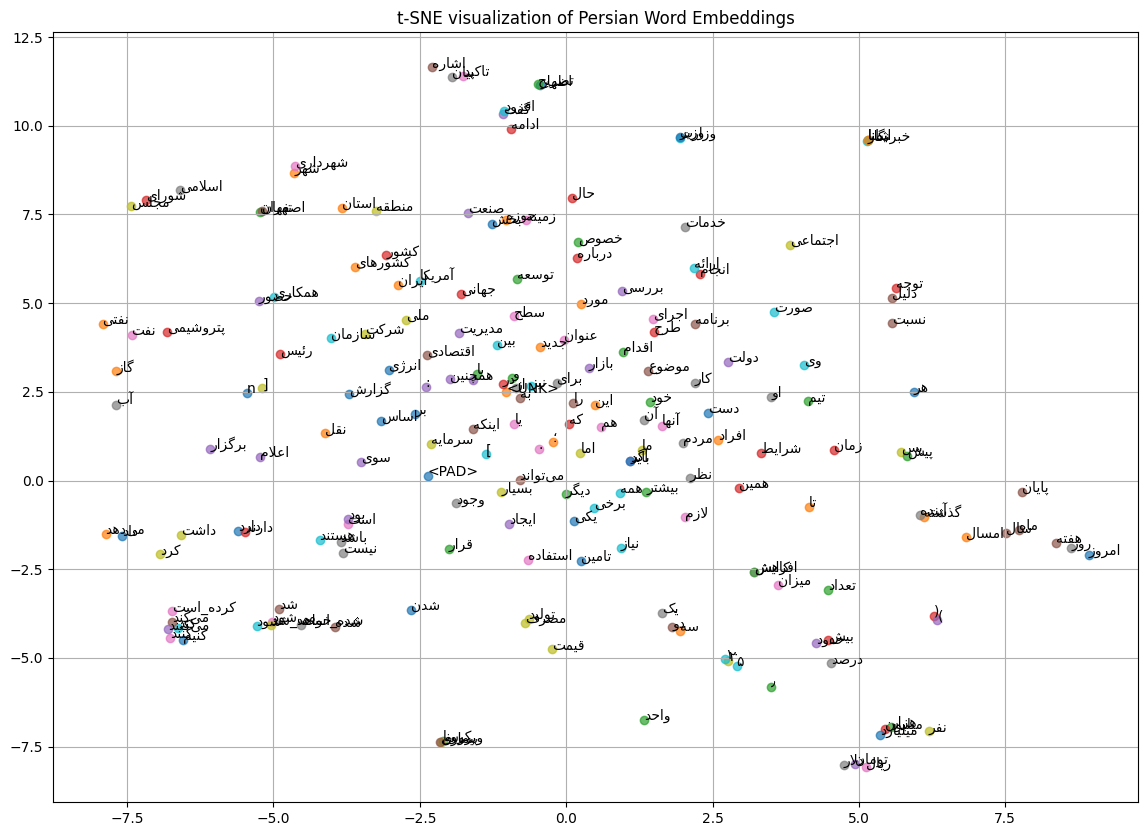

In [28]:
plot_embeddings(model.embeddings.weight.data, tokenizer, num_words=200)

### üü° Step 10: Find similar words

In [29]:
trained_embeddings = model.embeddings.weight.data

def get_similar_words(word, top_k=5):
    if word in tokenizer.get_vocab():
        word_id = tokenizer.encode(word)[0]
        word_embedding = trained_embeddings[word_id].unsqueeze(0)

        # Compute cosine similarity with all embeddings
        similarities = F.cosine_similarity(word_embedding, trained_embeddings)

        # Get top-k+1 to exclude the word itself
        top_k_ids = torch.topk(similarities, top_k + 1).indices.tolist()

        # Extract words and similarities
        similar_words_with_scores = []
        for idx in top_k_ids:
            if idx != word_id:
                token = tokenizer.decode([idx])
                score = similarities[idx].item()
                similar_words_with_scores.append((token, round(score, 4)))
            if len(similar_words_with_scores) == top_k:
                break

        print(f"⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß '{word}': {similar_words_with_scores}")
    else:
        print(f"⁄©ŸÑŸÖŸá ¬´{word}¬ª ÿØÿ± ŸÅŸáÿ±ÿ≥ÿ™ Ÿàÿß⁄ò⁄ØÿßŸÜ Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ. ‚òπÔ∏è")


In [30]:
# Example usage
get_similar_words("ÿß€åÿ±ÿßŸÜ")

⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß 'ÿß€åÿ±ÿßŸÜ': [(['⁄©ÿ¥Ÿàÿ±ŸÖÿßŸÜ'], 0.6861), (['⁄Ü€åŸÜ'], 0.5321), (['ÿ™ÿ±⁄©€åŸá'], 0.4972), (['⁄©ÿ¥Ÿàÿ±ÿ¥'], 0.4473), (['ÿßÿ±ŸàŸæÿß'], 0.4351)]


In [31]:
get_similar_words("⁄Øÿ≤ÿßÿ±ÿ¥")

⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß '⁄Øÿ≤ÿßÿ±ÿ¥': [(['ÿÆÿ®ÿ±⁄Øÿ≤ÿßÿ±€å'], 0.5501), (['ÿÆÿ®ÿ±ŸÜ⁄Øÿßÿ±'], 0.5247), (['⁄ØŸÅÿ™Ÿá'], 0.5242), (['ÿ®Ÿá\u200c⁄Øÿ≤ÿßÿ±ÿ¥'], 0.5232), (['ÿß€åÿ±ŸÜÿß'], 0.4945)]


In [32]:
get_similar_words("ŸÖÿπŸÑŸÖ")

⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß 'ŸÖÿπŸÑŸÖ': [(['ÿØÿßŸÜÿ¥\u200cÿ¢ŸÖŸàÿ≤'], 0.6352), (['ÿ™ÿπŸÑ€åŸÖ'], 0.6021), (['ÿ™ÿ≠ÿµ€åŸÑ'], 0.5495), (['ÿ¢ŸÖŸàÿ≤ÿßŸÜ'], 0.5452), (['ŸÖÿØÿ±ÿ≥Ÿá'], 0.5451)]


In [33]:
get_similar_words("ÿ™Ÿáÿ±ÿßŸÜ")

⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß 'ÿ™Ÿáÿ±ÿßŸÜ': [(['ÿßÿµŸÅŸáÿßŸÜ'], 0.7897), (['ŸÖÿ¥ŸáÿØ'], 0.6999), (['ŸÇÿ≤Ÿà€åŸÜ'], 0.6613), (['ÿ¥€åÿ±ÿßÿ≤'], 0.6467), (['ÿ≥ŸÖŸÜÿßŸÜ'], 0.6235)]


In [34]:
get_similar_words("ÿ¥ÿ®")

⁄©ŸÑŸÖÿßÿ™ ŸÖÿ¥ÿßÿ®Ÿá ÿ®ÿß 'ÿ¥ÿ®': [(['ÿ®ÿßŸÖÿØÿßÿØ'], 0.6236), (['ÿ±Ÿàÿ≤'], 0.6233), (['ŸÅÿ±ÿØÿß'], 0.5917), (['ÿ®ÿπÿØÿßÿ≤ÿ∏Ÿáÿ±'], 0.5867), (['ÿµÿ®ÿ≠'], 0.5851)]


In [35]:
get_similar_words("ŸæŸà€åÿßŸÜ")

⁄©ŸÑŸÖŸá ¬´ŸæŸà€åÿßŸÜ¬ª ÿØÿ± ŸÅŸáÿ±ÿ≥ÿ™ Ÿàÿß⁄ò⁄ØÿßŸÜ Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ. ‚òπÔ∏è


### üü° Step 11: Analogy Task (word_a - word_b + word_c ‚âà ?)

In [36]:
def analogy(word_a, word_b, word_c, top_k=3):
    vocab = tokenizer.get_vocab()

    for word in [word_a, word_b, word_c]:
        if word not in vocab:
            print(f"⁄©ŸÑŸÖŸá ¬´{word}¬ª ÿØÿ± Ÿàÿß⁄ò⁄ØÿßŸÜ Ÿàÿ¨ŸàÿØ ŸÜÿØÿßÿ±ÿØ.")
            return []

    embedding_weights = model.embeddings.weight.data

    id_a = torch.tensor(tokenizer.token_to_id(word_a))
    id_b = torch.tensor(tokenizer.token_to_id(word_b))
    id_c = torch.tensor(tokenizer.token_to_id(word_c))

    vec_a = embedding_weights[id_a]
    vec_b = embedding_weights[id_b]
    vec_c = embedding_weights[id_c]

    target_vec = vec_a - vec_b + vec_c

    similarities = F.cosine_similarity(target_vec.unsqueeze(0), embedding_weights)

    exclude_ids = {id_a.item(), id_b.item(), id_c.item()}
    top_ids = [i for i in torch.topk(similarities, top_k + 3).indices.tolist() if i not in exclude_ids][:top_k]

    result = [tokenizer.id_to_token(i) for i in top_ids]
    print(f"Analogies ‚Üí '{word_a}' - '{word_b}' + '{word_c}' ‚âà ")
    return result

In [ ]:
analogy("ÿØŸÑÿßÿ±", "ÿ¢ŸÖÿ±€å⁄©ÿß", "ÿß€åÿ±ÿßŸÜ")

Analogies ‚Üí 'ÿØŸÑÿßÿ±' - 'ÿ¢ŸÖÿ±€å⁄©ÿß' + 'ÿß€åÿ±ÿßŸÜ' ‚âà 


['ÿ™ŸàŸÖÿßŸÜ', 'ÿ™ŸàŸÖÿßŸÜ€å', '€åŸàÿ±Ÿà']

In [38]:
analogy("ŸæŸàŸÑ", "ÿ®ÿßŸÜ⁄©", "ÿ®Ÿàÿ±ÿ≥")

Analogies ‚Üí 'ŸæŸàŸÑ' - 'ÿ®ÿßŸÜ⁄©' + 'ÿ®Ÿàÿ±ÿ≥' ‚âà 


['ŸÅÿ±ÿßÿ®Ÿàÿ±ÿ≥', 'ŸÖÿ≤ÿß€åÿØŸá', 'ÿ≥ŸáÿßŸÖ']

In [39]:
analogy("ÿ®ÿ¥⁄©Ÿá", "ŸÜŸÅÿ™", "⁄Øÿßÿ≤")

Analogies ‚Üí 'ÿ®ÿ¥⁄©Ÿá' - 'ŸÜŸÅÿ™' + '⁄Øÿßÿ≤' ‚âà 


['ŸÖÿ™ÿ±ŸÖ⁄©ÿπÿ®', 'ŸÑ€åÿ™ÿ±', 'ÿ™ŸÜ']